# I. Import các thư viện cần thiết

In [115]:
import numpy as np
import pandas as pd   
import seaborn as sns
import matplotlib.pyplot as plt

# II. Đọc Data vào Dataframe. Data được thu thập thủ công từ trang https://www.worldometers.info/coronavirus/ vào ngày 02/05/2022

In [102]:
Data = pd.read_csv('data.csv',sep=';')

In [121]:
Data

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
0,0.0,World,513697783,154755,6262191,623.0,467939862,337659,39495730,40904,65903,803.4,0,0,0
1,1.0,USA,83083425,0,1020854,0.0,80719929,0,1342642,1554,248345,3051,1005593629,3005820,334548810
2,2.0,India,43082502,0,523869,0.0,42538976,0,19657,698,30668,373,838208698,596678,1404791509
3,3.0,Brazil,30454490,0,663567,0.0,29533039,0,257884,8318,141438,3082,63776166,296193,215319917
4,4.0,France,28682011,0,145962,0.0,26826905,0,1709144,1557,437643,2227,266484045,4066138,65537387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224.0,MS Zaandam,9,0,2,0.0,7,0,0,0,0,0,0,0,0
225,225.0,Niue,9,0,0,0.0,7,0,2,0,5468,0,0,0,1646
226,226.0,Micronesia,7,0,0,0.0,1,0,6,0,60,0,0,0,117226
227,227.0,Nauru,5,0,0,0.0,3,0,2,0,457,0,0,0,10948


# III. Tiền xử lí dữ liệu

In [104]:
def data_preprocessing(Data):
    for col_name in Data:
        temp = []     
        for col in Data[col_name]:   #geting column elements for the each title
            col = str(col)
            col = col.replace(',','')# Removing unwanted data clutter
            try:   
                col = int(col)
            except:
                pass
            temp.append(col)
        Data[col_name] = temp
    return Data

In [126]:
Data = Data.fillna(0)
Data = data_preprocessing(Data) 
Data

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
0,0.0,World,513697783,154755,6262191,623.0,467939862,337659,39495730,40904,65903,803.4,0,0,0
1,1.0,USA,83083425,0,1020854,0.0,80719929,0,1342642,1554,248345,3051,1005593629,3005820,334548810
2,2.0,India,43082502,0,523869,0.0,42538976,0,19657,698,30668,373,838208698,596678,1404791509
3,3.0,Brazil,30454490,0,663567,0.0,29533039,0,257884,8318,141438,3082,63776166,296193,215319917
4,4.0,France,28682011,0,145962,0.0,26826905,0,1709144,1557,437643,2227,266484045,4066138,65537387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224.0,MS Zaandam,9,0,2,0.0,7,0,0,0,0,0,0,0,0
225,225.0,Niue,9,0,0,0.0,7,0,2,0,5468,0,0,0,1646
226,226.0,Micronesia,7,0,0,0.0,1,0,6,0,60,0,0,0,117226
227,227.0,Nauru,5,0,0,0.0,3,0,2,0,457,0,0,0,10948


# IV. Trực quan hóa với các mô hình

## 1. Top 10 quốc gia có tổng số ca nhiễm cao nhất thế giới 

(Trường được chọn: "Country, Other" và "Total Cases")

In [136]:
data_non_world = Data.drop([0])
data_non_world

,#,"Country, Other",Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/ 1M pop,Deaths/ 1M pop,Total Tests,Tests/1M pop,Population
1,1.0,USA,83083425,0,1020854,0.0,80719929,0,1342642,1554,248345,3051,1005593629,3005820,334548810
2,2.0,India,43082502,0,523869,0.0,42538976,0,19657,698,30668,373,838208698,596678,1404791509
3,3.0,Brazil,30454490,0,663567,0.0,29533039,0,257884,8318,141438,3082,63776166,296193,215319917
4,4.0,France,28682011,0,145962,0.0,26826905,0,1709144,1557,437643,2227,266484045,4066138,65537387
5,5.0,Germany,24791190,20595,135947,34.0,22469200,1132,2186043,1446,294176,1613,122332384,1451613,84273389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,224.0,MS Zaandam,9,0,2,0.0,7,0,0,0,0,0,0,0,0
225,225.0,Niue,9,0,0,0.0,7,0,2,0,5468,0,0,0,1646
226,226.0,Micronesia,7,0,0,0.0,1,0,6,0,60,0,0,0,117226
227,227.0,Nauru,5,0,0,0.0,3,0,2,0,457,0,0,0,10948


In [137]:
data_non_world = Data.drop([0])
df_groupbyCase=data_non_world.groupby("Country, Other",axis=0).sum()
df_groupbyCase.sort_values(by="Total Cases",ascending=False,axis=0,inplace=True)
df_groupbyCase=df_groupbyCase.head(10)
df_groupbyCase=df_groupbyCase["Total Cases"]

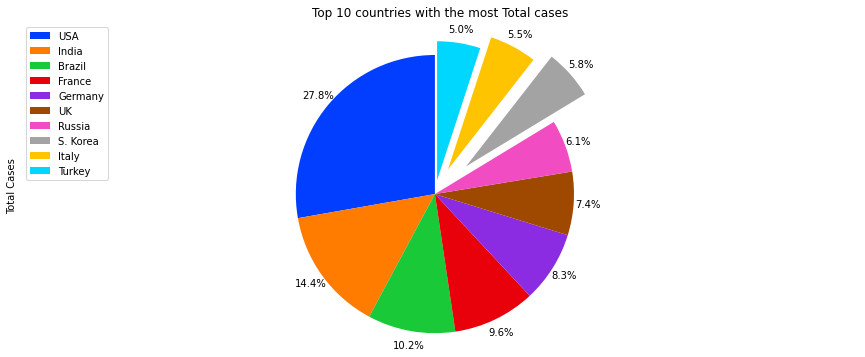

In [138]:
explode_list=[0,0,0,0,0,0,0,0.3,0.2,0.1]
df_groupbyCase.plot(kind='pie',figsize=(15,6),autopct="%1.1f%%",startangle=90,labels=None,pctdistance=1.1
                            ,explode=explode_list,colors = sns.color_palette('bright')[0:10])
plt.title("Top 10 countries with the most Total cases")
plt.axis('equal')
plt.legend(labels=df_groupbyCase.index,loc='upper left');

## 2. Biểu đồ Heatmap thể hiện tương quan trong các ca nhiễm 

(Trường được chọn: "Total Cases", "New Cases", "Total Deaths", "New Deaths", "Total Recovered", "Active Cases", "Serious, Critical")

In [139]:
features = ["Total Cases","New Cases","Total Deaths","New Deaths","Total Recovered","Active Cases","Serious, Critical"]
case_corr = Data[features].corr()
case_corr

,Total Cases,New Cases,Total Deaths,Total Recovered,Active Cases,"Serious, Critical"
Total Cases,1.000000,0.935821,0.995217,0.999242,0.984333,0.969603
New Cases,0.935821,1.000000,0.922402,0.929686,0.950530,0.919567
Total Deaths,0.995217,0.922402,1.000000,0.995338,0.978113,0.978374
Total Recovered,0.999242,0.929686,0.995338,1.000000,0.982326,0.968264
Active Cases,0.984333,0.950530,0.978113,0.982326,1.000000,0.970091
"Serious, Critical",0.969603,0.919567,0.978374,0.968264,0.970091,1.000000


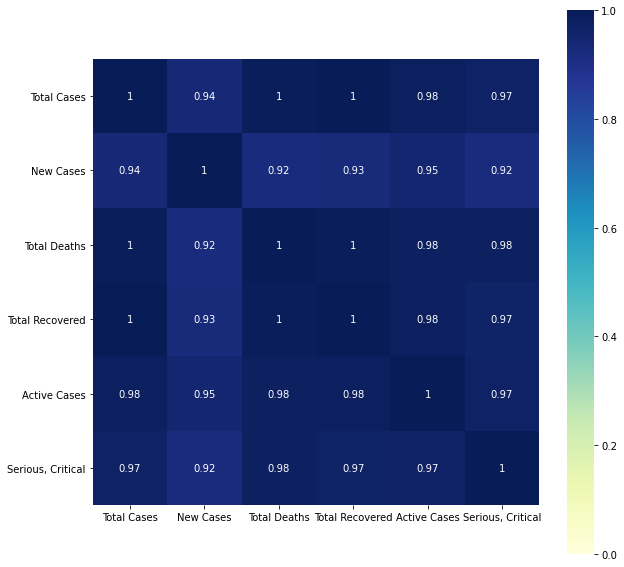

In [140]:
plt.figure(figsize=(10, 10))
sns.heatmap(case_corr,cmap="YlGnBu",vmin=0, annot=True, square=True);